## **Dicky Anugrah G6401221027**

#### Objective Sentence
The objective of this analysis is to predict the price per night based on various property characteristics, such as room type, capacity, distance to the city center, and other features. Therefore, we need to identify the factors that influence the price per night for each property listing.


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
import pickle
from scipy.special import inv_boxcox
import joblib


## Data Wrangling

## **1. Gathering Data**
The dataset used in this project is secondary data for the BPNS certification screening stage and can be found [here](https://drive.google.com/drive/folders/1LfyM85wM-zoYx9USz71wQJVgCwyS2nhS?usp=sharing). The dataset consists of 41,365 rows of data and 18 columns. The details of each column are as follows:

Attribue                   | Description
-------------------------- | -----------------------------------------------------------------------------
property_id                | Unique identifier for each property listing.
room_type                  | Type of room being rented.
room_shared                | Whether the room is shared or not.
room_private               | Whether the room is private or not.
person_capacity            | Maximum capacity of guests.
host_is_superhost          | The host's status (whether they are a superhost or not).
cleanliness_rating         | Rating for the cleanliness of the property.
multi                      | Whether the listing has multiple rooms or not.
biz                        | Whether the listing is intended for business purposes or not.
guest_satisfaction_overall | Overall guest satisfaction score.
bedrooms                   | Number of bedrooms in the listing.
dist                       | Distance from the city center.
metro_dist                 | Distance from the nearest metro station.
city                       | Name of the city where the property is located.
country                    | Name of the country where the property is located.
weekends                   | Whether the price is for the weekend (holiday) or weekdays (workdays).
last_update                | Date when the information was last updated.
price_night                | Price per night for renting the property in Euros.




In [ ]:
df = pd.read_csv('/content/dataset_properti_utama.csv')
df.head()

,property_id,price_night,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,country,weekends,last_update
0,556793856,502.60,Entire home/apt,False,False,4,False,0,1,9,87,2,3.696837,0.797643,London,United Kingdom,False,2022-04-09
1,371851269,276.98,Entire home/apt,False,False,4,False,1,0,9,90,1,2.676515,0.310118,Vienna,Austria,False,2024-06-29
2,337379333,854.40,Entire home/apt,False,False,4,False,0,0,10,98,3,3.385826,0.859196,Amster dam,Netherlands,False,2021-05-10
3,423755786,233.58,NaN,False,False,4,True,0,0,10,99,1,1.250374,0.712542,Lisbon,Portugal,True,2023-01-29
4,877789195,297.55,Entire home/apt,False,False,2,False,0,1,10,100,1,4.478704,1.494518,Vienna,Austria,False,2024-03-26


## **2. Data Exploration**

#### Check Data Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   39639 non-null  object 
 3   room_shared                 41365 non-null  bool   
 4   room_private                41365 non-null  bool   
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  bool   
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

**Insight:**
- There are missing values in the columns room_type and country.

- There are 8 categorical columns: room_type, room_shared, room_private, host_is_superhost, city, country, weekends, last_update.

- There are 9 numerical columns: price_night, person_capacity, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist.

- The column last_update is of object type but contains date information, so it should be converted to datetime for time-based analysis.

In [ ]:
df.describe()

,property_id,price_night,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
count,4.136500e+04,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000
mean,5.482771e+08,280.246151,3.154744,0.291261,0.351505,9.388517,92.597728,1.166832,3.188234,0.681725
std,2.601680e+08,326.449843,1.301741,0.454349,0.477446,0.959069,8.987673,0.758628,2.393964,0.861555
min,1.000092e+08,37.130000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301
25%,3.223914e+08,148.870000,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.449390,0.248514
50%,5.467391e+08,211.540000,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.611458,0.413251
75%,7.737911e+08,320.360000,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,4.259105,0.735096
max,9.999958e+08,16445.610000,6.000000,1.000000,1.000000,10.000000,100.000000,26.000000,25.284557,14.273577


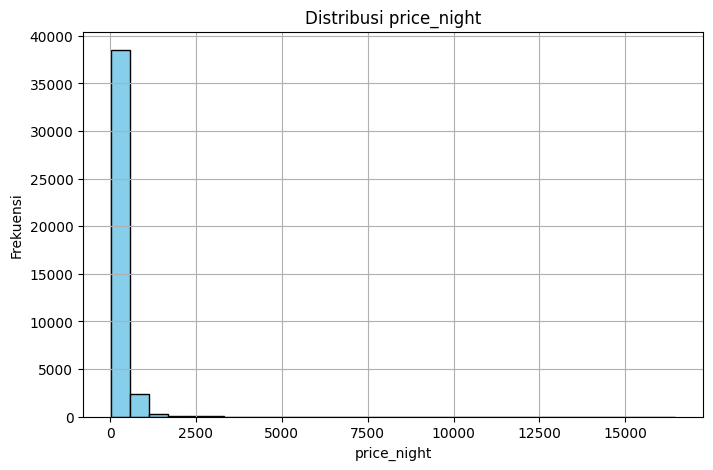

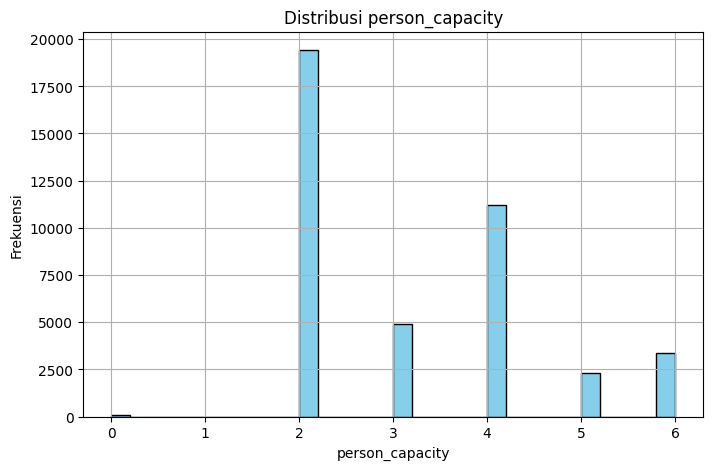

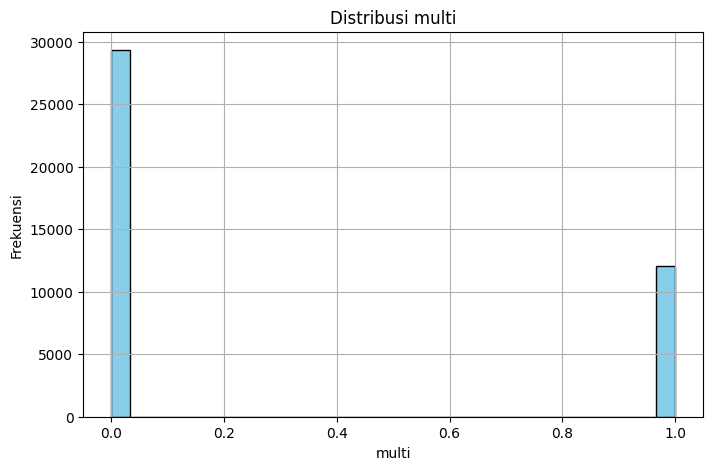

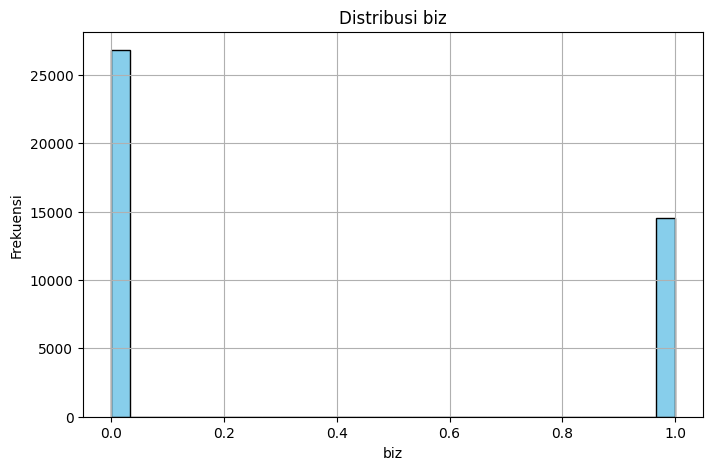

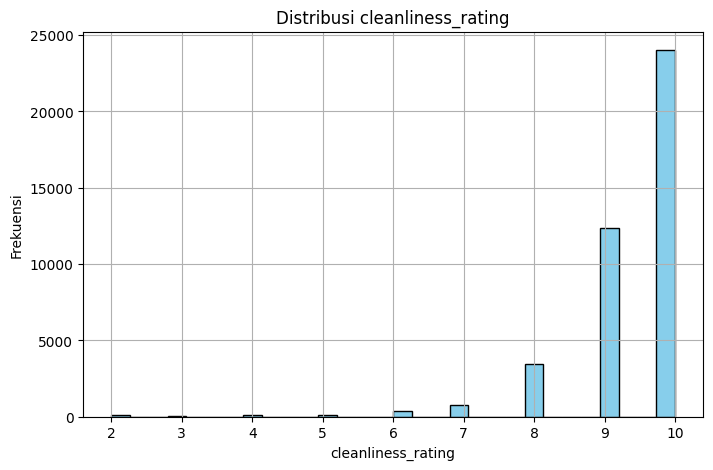

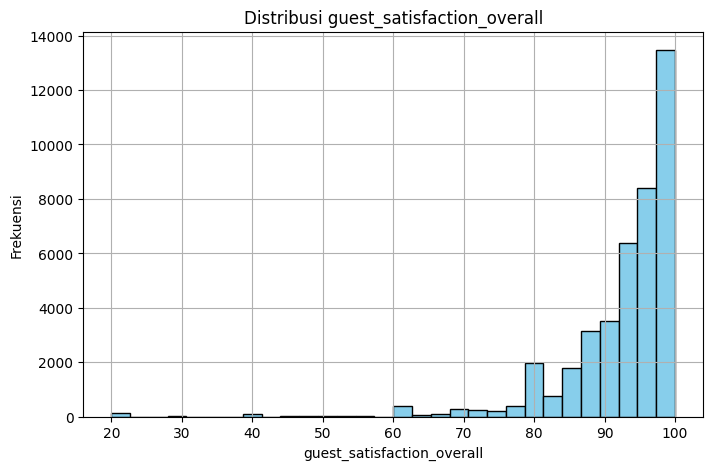

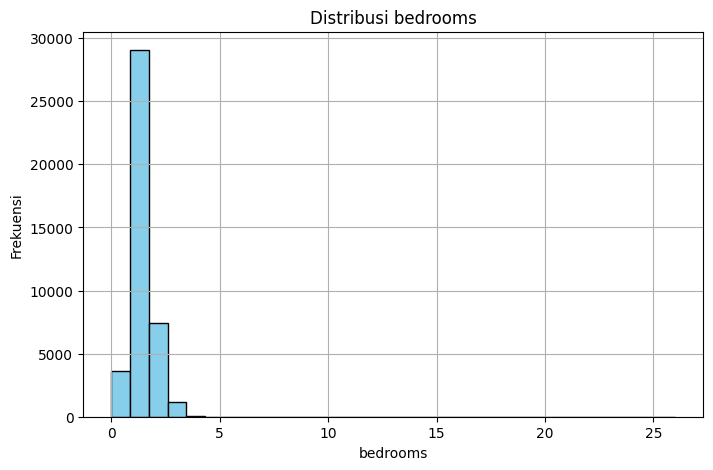

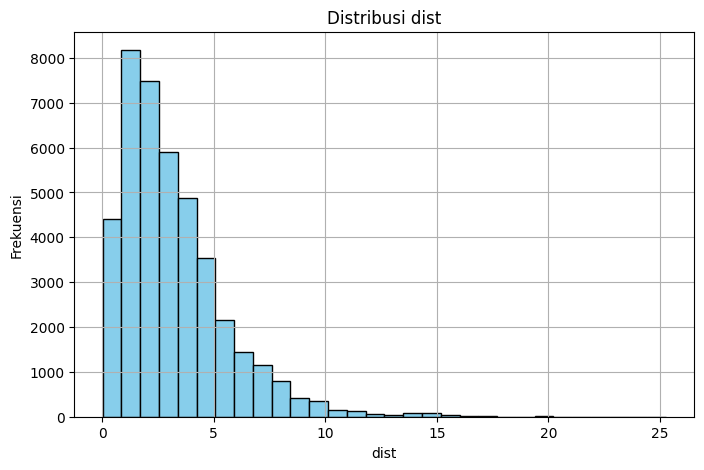

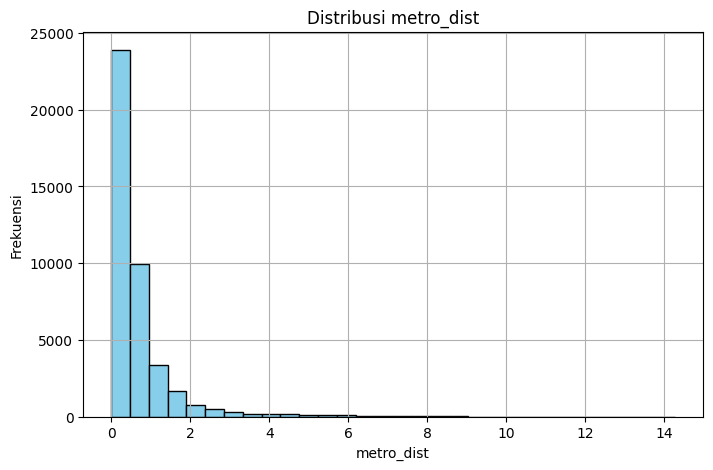

In [ ]:
numeric_cols = ['price_night', 'person_capacity', 'multi', 'biz',
                'cleanliness_rating', 'guest_satisfaction_overall',
                'bedrooms', 'dist', 'metro_dist']

# Plot histogram
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

In [ ]:
for col in numeric_cols:
  print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for price_night:
price_night
184.46     149
161.55     131
126.72     130
116.00     116
138.96     112
          ... 
3338.38      1
511.46       1
377.24       1
352.25       1
185.03       1
Name: count, Length: 9064, dtype: int64

Value counts for person_capacity:
person_capacity
2    19425
4    11232
3     4919
6     3381
5     2335
0       73
Name: count, dtype: int64

Value counts for multi:
multi
0    29317
1    12048
Name: count, dtype: int64

Value counts for biz:
biz
0    26825
1    14540
Name: count, dtype: int64

Value counts for cleanliness_rating:
cleanliness_rating
10    24033
9     12373
8      3467
7       778
6       398
4       117
2       116
5        75
3         8
Name: count, dtype: int64

Value counts for guest_satisfaction_overall:
guest_satisfaction_overall
100    8486
98     3118
97     2910
96     2806
95     2677
93     2668
94     2105
90     2091
99     1872
80     1658
92     1623
91     1409
88     1079
89     1044
87     1006
86      619


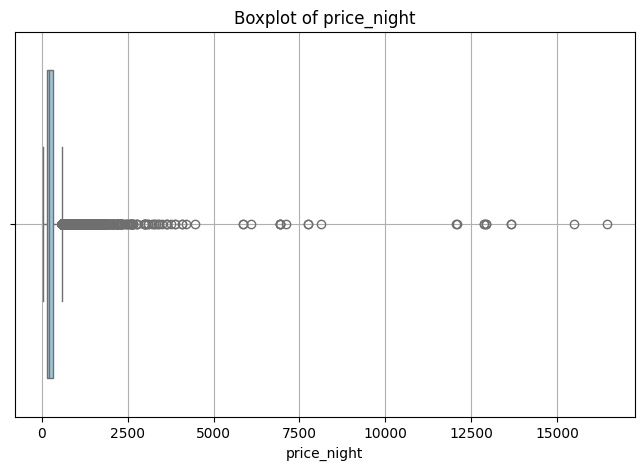

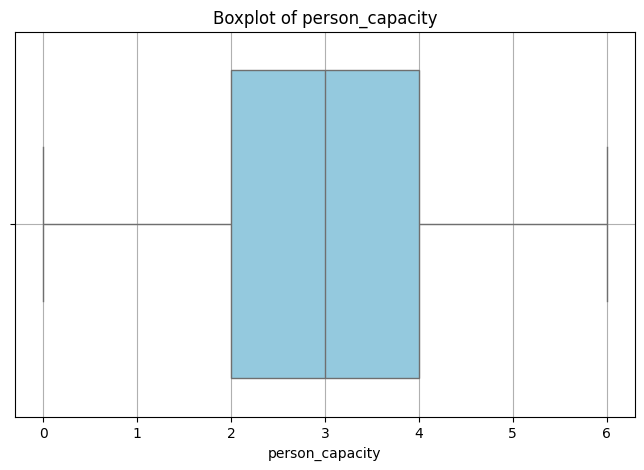

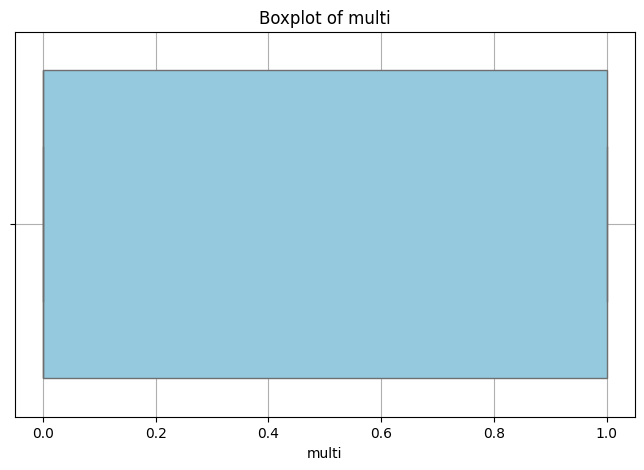

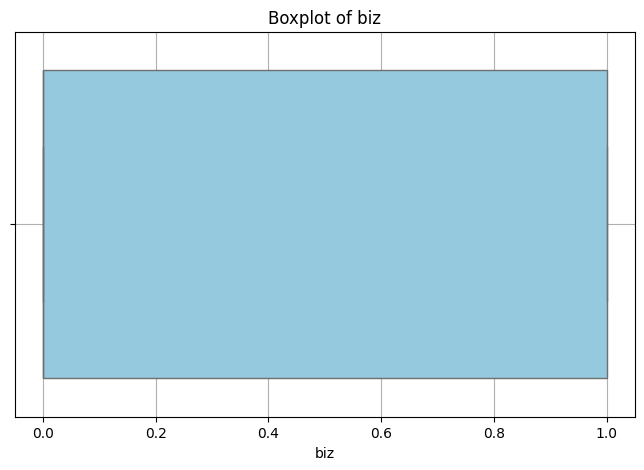

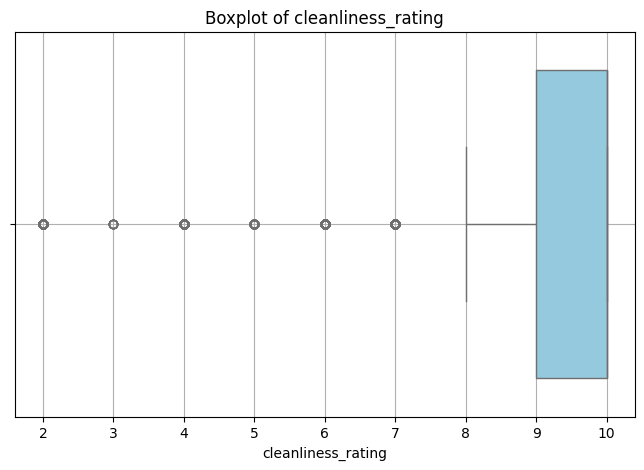

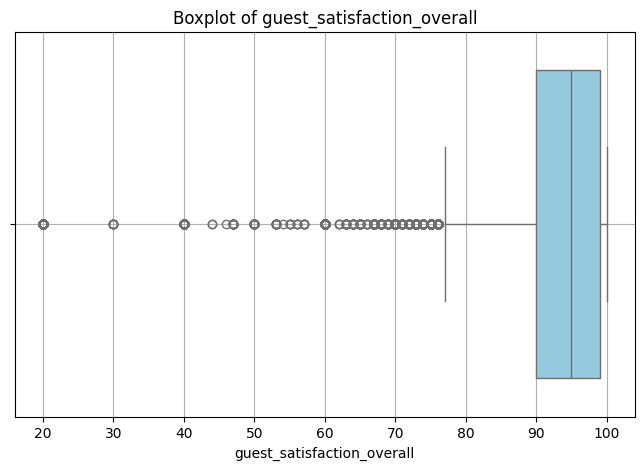

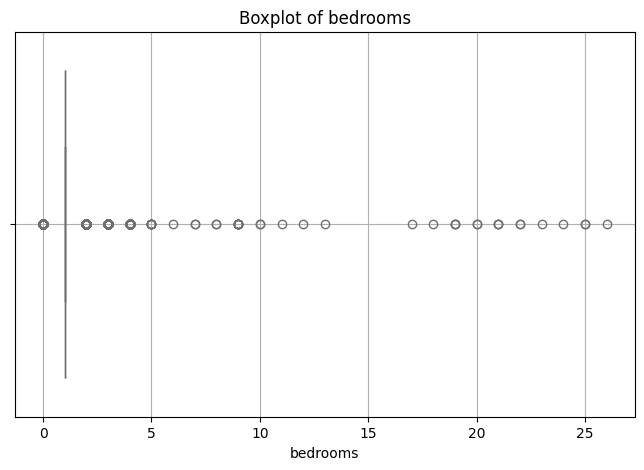

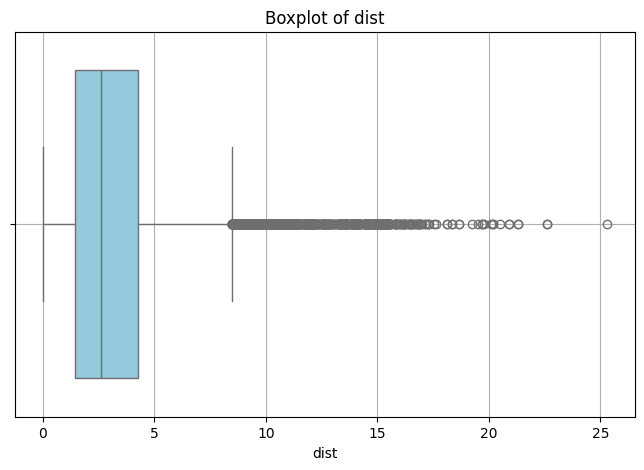

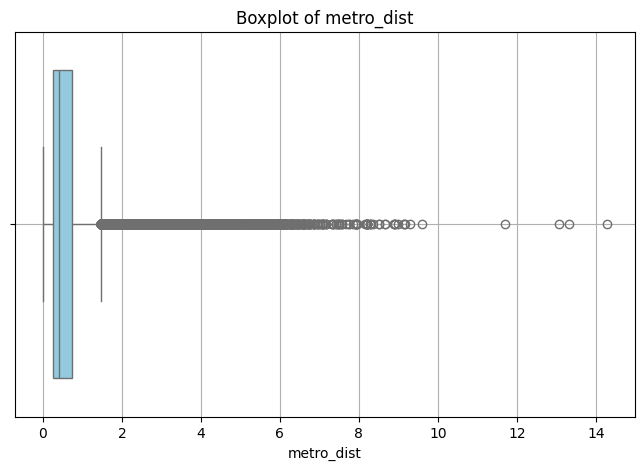

In [ ]:
numeric_cols = ['price_night', 'person_capacity', 'multi', 'biz',
                'cleanliness_rating', 'guest_satisfaction_overall',
                'bedrooms', 'dist', 'metro_dist']

# Plot boxplot satu per satu
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
property_id,41365.0,NaN,NaN,NaN,548277068.726943,260168042.630909,100009239.0,322391378.0,546739097.0,773791122.0,999995751.0
price_night,41365.0,NaN,NaN,NaN,280.246151,326.449843,37.13,148.87,211.54,320.36,16445.61
room_type,39639,3,Entire home/apt,25023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_shared,41365,2,False,41064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_private,41365,2,False,26408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_capacity,41365.0,NaN,NaN,NaN,3.154744,1.301741,0.0,2.0,3.0,4.0,6.0
host_is_superhost,41365,2,False,30747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multi,41365.0,NaN,NaN,NaN,0.291261,0.454349,0.0,0.0,0.0,1.0,1.0
biz,41365.0,NaN,NaN,NaN,0.351505,0.477446,0.0,0.0,0.0,1.0,1.0
cleanliness_rating,41365.0,NaN,NaN,NaN,9.388517,0.959069,2.0,9.0,10.0,10.0,10.0


**Insight:**
- price_night, dist, metro_dist: These three columns show a right-skewed distribution, with many small values and a few very high values. A transformation (such as Box-Cox) should be applied to reduce the influence of outliers and bring the distribution closer to normal.

- person_capacity: There are 73 values of 0, which are clearly unrealistic as the capacity cannot be 0. These values should be replaced with the previous values using imputation techniques to correct data consistency.

- multi, biz: No outliers were found in these two columns. The data distribution appears quite normal without extreme values, so no further treatment is necessary.

- cleanliness_rating: In this column, values below 8 are considered outliers. However, these values are still reasonable, considering that some properties may have poor cleanliness. Therefore, these values should be retained without further handling.

- guest_satisfaction_overall: Values below 80 are considered outliers, although there are many valid data points below this threshold. Given the amount of data in this range, these values should be imputed using Winsorization to maintain a more consistent distribution.

- bedrooms: There are values of 0 and more than 7 bedrooms, which are unusual and likely due to data entry errors. These values should be handled using Winsorization, and properties with more than 7 bedrooms should be considered outliers that need further attention.

#### Check Unique Values

In [ ]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 20)

room_type
Entire home/apt    25023
Private room       14324
NaN                 1726
Shared room          292
Name: count, dtype: int64
--------------------
room_shared
False    41064
True       301
Name: count, dtype: int64
--------------------
room_private
False    26408
True     14957
Name: count, dtype: int64
--------------------
host_is_superhost
False    30747
True     10618
Name: count, dtype: int64
--------------------
city
London        7994
Rome          7185
Paris         5350
Lisbon        4610
Athens        4224
Budapest      3218
Vienna        2830
Barcelona     2266
Berlin        1987
Amsterdam     1478
Amster dam     159
Roma            37
Amterdam        27
Name: count, dtype: int64
--------------------
country
United Kingdom    7820
Italy             7083
France            5231
Portugal          4516
Greece            4121
NaN               4052
Austria           2769
Spain             2210
Germany           1940
Netherlands       1623
Name: count, dtype: int64
------

**Insight:**
- r    oom_type: There are 1,726 missing values. The majority of listings are of the "Entire home/apt" type. Imputation or investigation of NaN values should be done before modeling.

- room_shared: The class distribution is highly imbalanced (False is much more frequent than True). During modeling, resampling (oversampling/undersampling) or class weighting should be applied.

- room_private: The class distribution is fairly imbalanced (False is more frequent than True). It is recommended to balance the data or apply class weights during modeling.

- host_is_superhost: The class distribution is moderately imbalanced (approximately a 1:3 ratio between True and False). This class imbalance should be considered when creating the model, for example, by using class_weight.

- city: There are duplicate city names (e.g., Amsterdam vs Amterdam vs Amster dam, Rome vs Roma). Standardizing city names is needed for consistency.

- country: There are 4,052 missing values. It is recommended to fill these based on the city or delete the rows if they cannot be imputed.

- weekends: The data is almost balanced between weekend and non-weekend availability. No special balancing treatment is needed.

- last_update: Many listings lack a date for the last update (706 entries). A new feature, such as has_recent_update, could be created to capture the freshness of the listing.



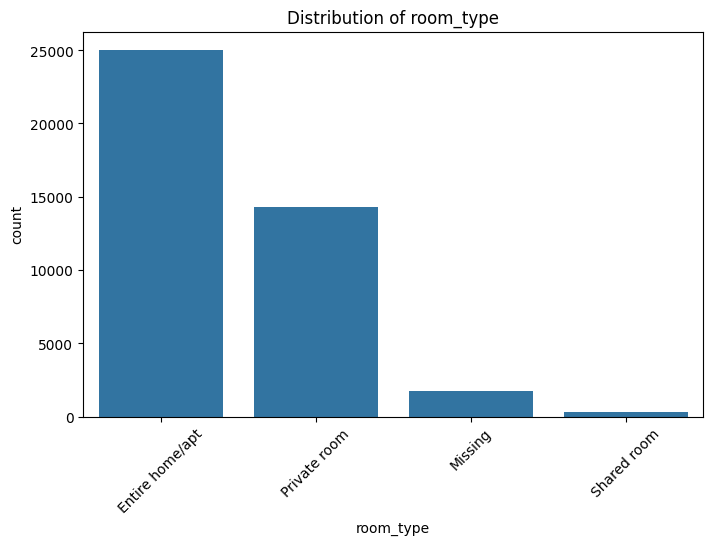

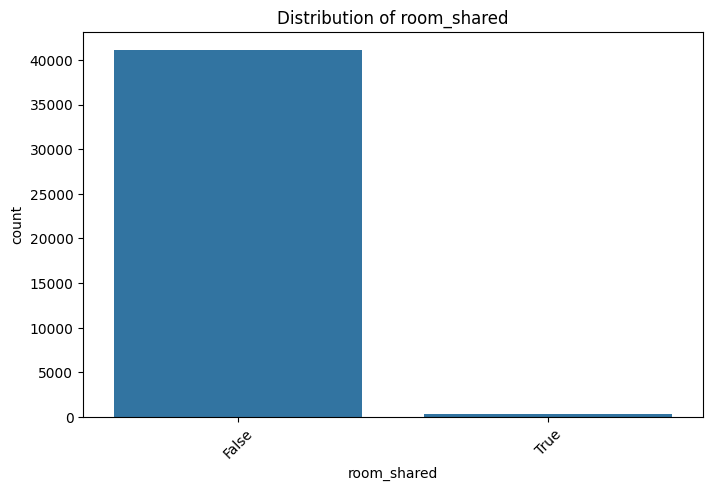

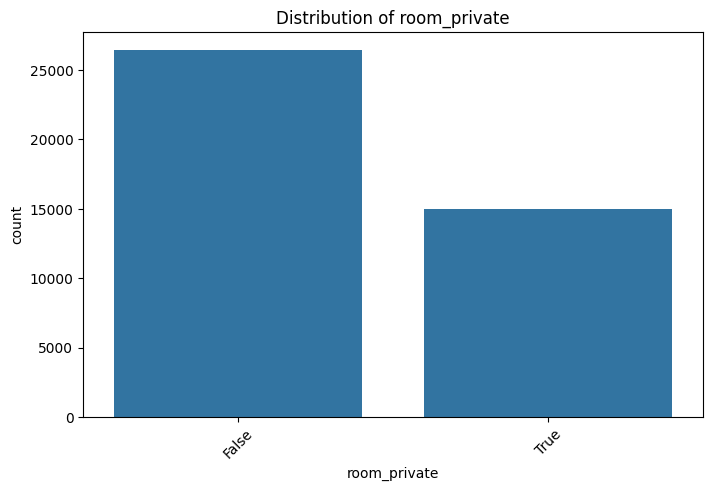

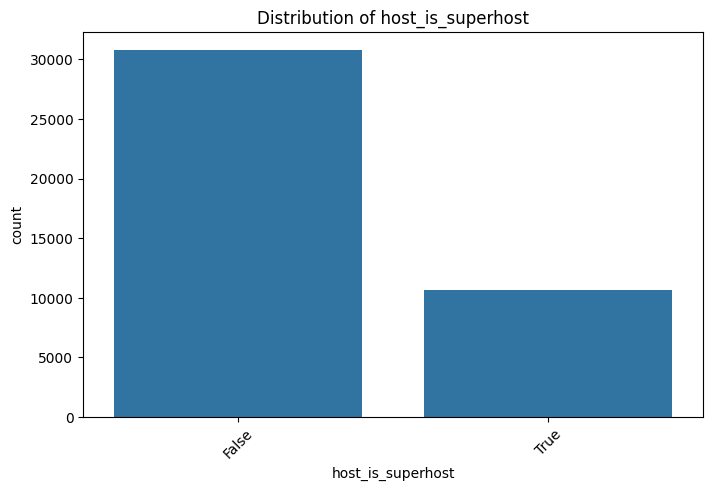

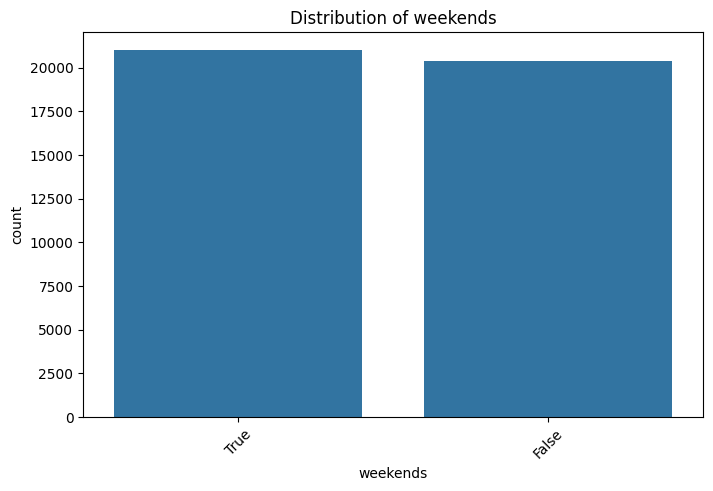

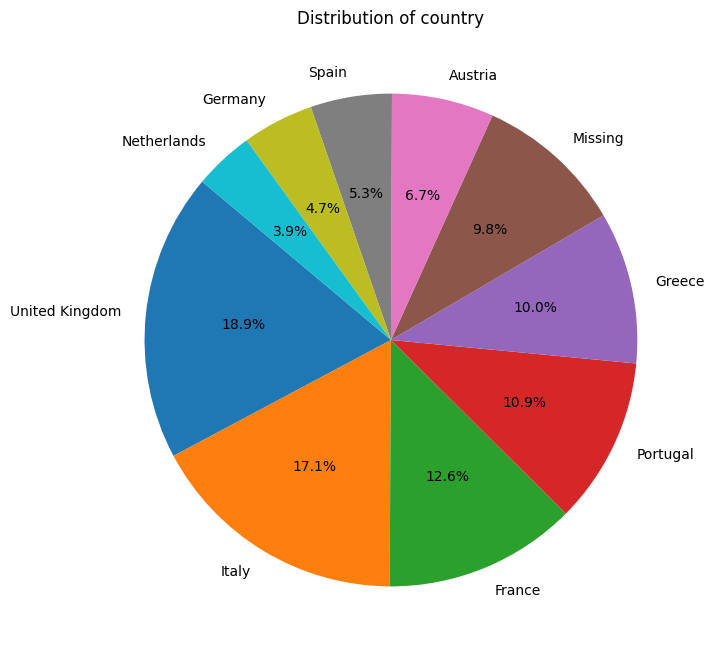

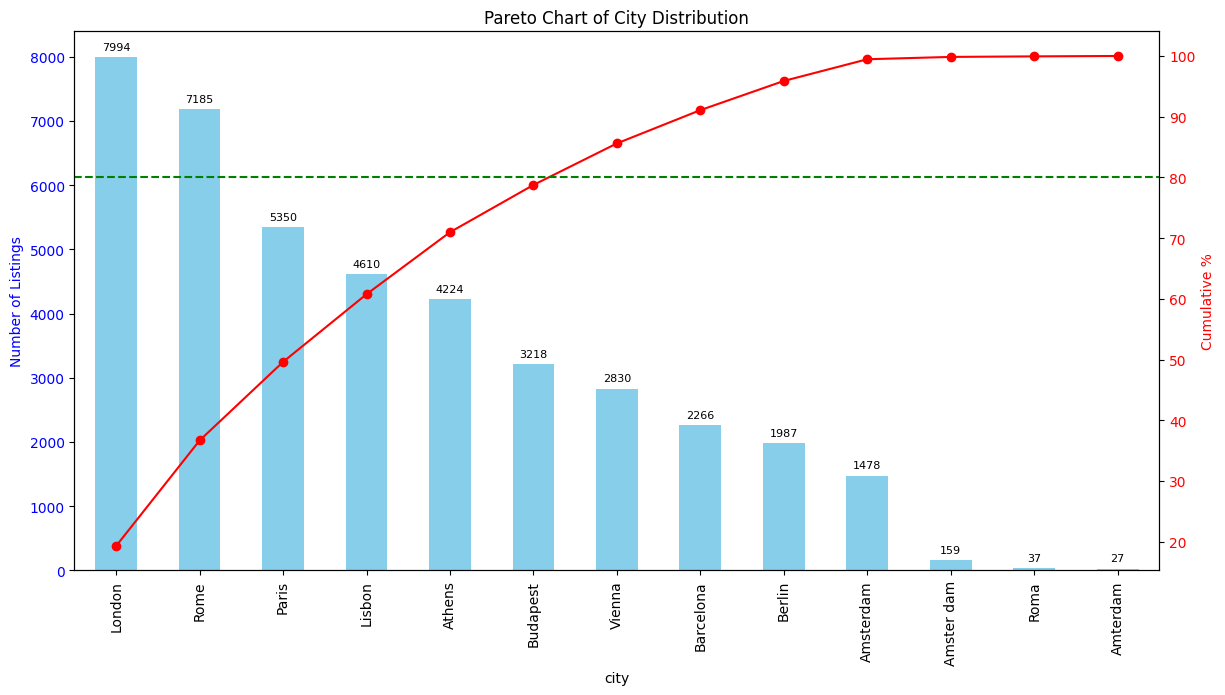

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns
bar_cols = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'weekends']
pie_cols = ['country']

# Create a copy of the dataframe for plotting
df_plot = df.copy()

# Fill NaN values with 'Missing' for selected columns
for col in bar_cols + pie_cols:
    df_plot[col] = df_plot[col].fillna('Missing')

# Calculate city distribution
city_counts = df_plot['city'].value_counts()
cumulative_percentage = city_counts.cumsum() / city_counts.sum() * 100

# Plot Bar Charts
for col in bar_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Plot Pie Charts
for col in pie_cols:
    plt.figure(figsize=(8,8))
    df_plot[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

# Pareto Chart for city distribution
fig, ax1 = plt.subplots(figsize=(14, 7))

bars = city_counts.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Number of Listings', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Add value labels on top of bars
for idx, value in enumerate(city_counts):
    ax1.text(idx, value + max(city_counts)*0.01, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
cumulative_percentage.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative %', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.axhline(80, color='green', linestyle='--')

plt.title('Pareto Chart of City Distribution')
plt.show()


## **3. Validation of Data**

#### Check Missing Values

In [ ]:
df.isnull().sum()


,0
property_id,0
price_night,0
room_type,1726
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0


**Insight:**
- This output is a continuation of the initial examination performed earlier using the info() method.

- It appears that there are missing values in the room_type and country columns, with 1,726 (4.17%) and 4,052 (9.80%) missing values, respectively, out of a total of 41,365 data entries.

In [ ]:
df['city'] = df['city'].replace({
    'Amster dam': 'Amsterdam',
    'Amterdam': 'Amsterdam',
    'Roma': 'Rome',
})

print(df['city'].unique())


['London' 'Vienna' 'Amsterdam' 'Lisbon' 'Berlin' 'Paris' 'Athens'
 'Budapest' 'Barcelona' 'Rome']


In [ ]:
df['country'].unique()

array(['United Kingdom', 'Austria', 'Netherlands', 'Portugal', 'Germany',
       'France', 'Greece', nan, 'Spain', 'Italy'], dtype=object)

**Insight:**
- Handling data inconsistencies by changing the values "Amster dam" and "Amterdam" to "Amsterdam" and "Roma" to "Rome" in the city column for further processing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   39639 non-null  object 
 3   room_shared                 41365 non-null  bool   
 4   room_private                41365 non-null  bool   
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  bool   
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

In [ ]:
nantype = df[df['room_type'].isna()]
nancount = df[df['country'].isna()]

city_to_country = {
    'London': 'United Kingdom',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Lisbon': 'Portugal',
    'Berlin': 'Germany',
    'Paris': 'France',
    'Athens': 'Greece',
    'Budapest': 'Hungary',
    'Barcelona': 'Spain',
    'Rome': 'Italy'
}

df.loc[df['country'].isna(), 'country'] = df.loc[df['country'].isna(), 'city'].map(city_to_country)

print(df[['property_id', 'city', 'country']].head(10))


   property_id       city         country
0    556793856     London  United Kingdom
1    371851269     Vienna         Austria
2    337379333  Amsterdam     Netherlands
3    423755786     Lisbon        Portugal
4    877789195     Vienna         Austria
5    616562711     Berlin         Germany
6    477495323      Paris          France
7    512491549     Athens          Greece
8    295305248     London  United Kingdom
9    486670369     Lisbon        Portugal


**insight:**
- The NaN values in the country column have been filled based on the city column, as they are related. It appears that a country is missing, specifically Hungary.

In [ ]:
cross_tab = pd.crosstab(df['country'], df['city'], margins=True, margins_name="Total")

print(cross_tab)


city            Amsterdam  Athens  Barcelona  Berlin  Budapest  Lisbon  \
country                                                                  
Austria                 0       0          0       0         0       0   
France                  0       0          0       0         0       0   
Germany                 0       0          0    1987         0       0   
Greece                  0    4224          0       0         0       0   
Hungary                 0       0          0       0      3218       0   
Italy                   0       0          0       0         0       0   
Netherlands          1664       0          0       0         0       0   
Portugal                0       0          0       0         0    4610   
Spain                   0       0       2266       0         0       0   
United Kingdom          0       0          0       0         0       0   
Total                1664    4224       2266    1987      3218    4610   

city            London  Paris  Rome  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   39639 non-null  object 
 3   room_shared                 41365 non-null  bool   
 4   room_private                41365 non-null  bool   
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  bool   
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

In [ ]:
# Correct syntax to access multiple columns and get unique values
for col in ['room_type', 'room_shared', 'room_private', 'person_capacity']:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'room_type': ['Entire home/apt' nan 'Private room' 'Shared room']
Unique values in column 'room_shared': [False  True]
Unique values in column 'room_private': [False  True]
Unique values in column 'person_capacity': [4 2 3 6 5 0]


In [ ]:
df['person_capacity'].unique()

array([4, 2, 3, 6, 5, 0])

In [ ]:
df['person_capacity'] = df['person_capacity'].replace(0, 1)


**insight:**
-     The value 0 in the person_capacity column has been changed to 1, as there are private rooms with no capacity for 1 person. It was concluded that the value 0 was actually a mistake due to incorrect data entry and should be treated as 1.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()
room_type_temp = df_temp['room_type']

df_temp = df_temp.drop(columns=['room_type'])

for col in df_temp.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    df_temp[col] = le.fit_transform(df_temp[col])

df_temp['room_type'] = room_type_temp

nantype = df_temp[df_temp['room_type'].isna()]
df_notna = df_temp.dropna(subset=['room_type'])

le_room_type = LabelEncoder()
df_notna['room_type'] = le_room_type.fit_transform(df_notna['room_type'])

# split x dan y
X_type = df_notna.drop(columns=['property_id', 'last_update', 'room_type'])
y_type = df_notna['room_type']

# training
rf_type = RandomForestClassifier(random_state=42)
rf_type.fit(X_type, y_type)
X_nantype = nantype.drop(columns=['property_id', 'last_update', 'room_type'])
predicted_room_type = rf_type.predict(X_nantype)

# Update dataframe
df.loc[df['room_type'].isna(), 'room_type'] = le_room_type.inverse_transform(predicted_room_type)
print(df[['property_id', 'room_type']].head(100))


<ipython-input-21-34b9b3b533c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notna['room_type'] = le_room_type.fit_transform(df_notna['room_type'])


    property_id        room_type
0     556793856  Entire home/apt
1     371851269  Entire home/apt
2     337379333  Entire home/apt
3     423755786  Entire home/apt
4     877789195  Entire home/apt
..          ...              ...
95    853147894  Entire home/apt
96    632553718  Entire home/apt
97    157417723     Private room
98    789053691  Entire home/apt
99    211681535     Private room

[100 rows x 2 columns]


**Insight:**
-    room_type & country: There are missing values (1,726 in room_type and 4,052 in country) which were imputed using other related columns for country and Random Forest for room_type. It would be difficult to distinguish between shared rooms or entire homes/apartments if room_capacity > 1.

- No train-test split: Since the model is only used for filling missing values internally, not for evaluating performance on new data, a train-test split was not performed.

- All features used: Random Forest automatically selects important features when building trees, so manual feature selection is not necessary.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   41365 non-null  object 
 3   room_shared                 41365 non-null  bool   
 4   room_private                41365 non-null  bool   
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  bool   
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

**Insight:**
-     It appears that the NaN values were successfully handled by Random Forest in both columns.



#### Data Transformation

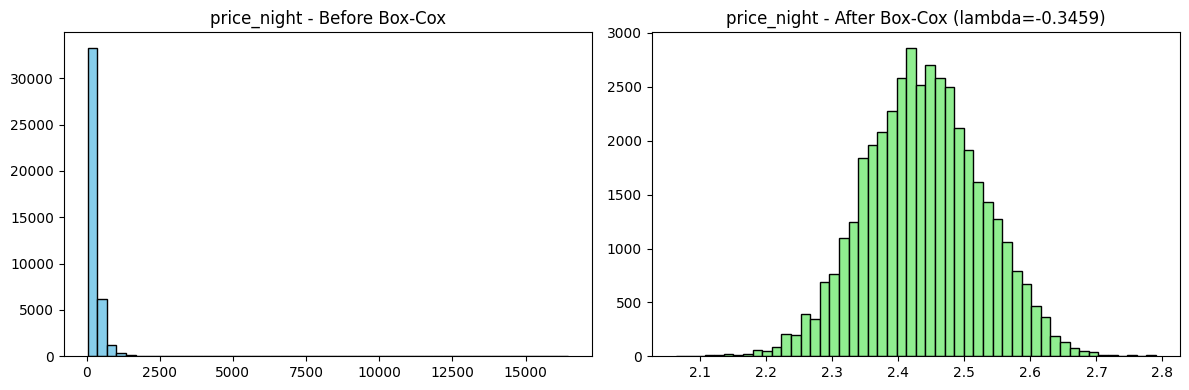

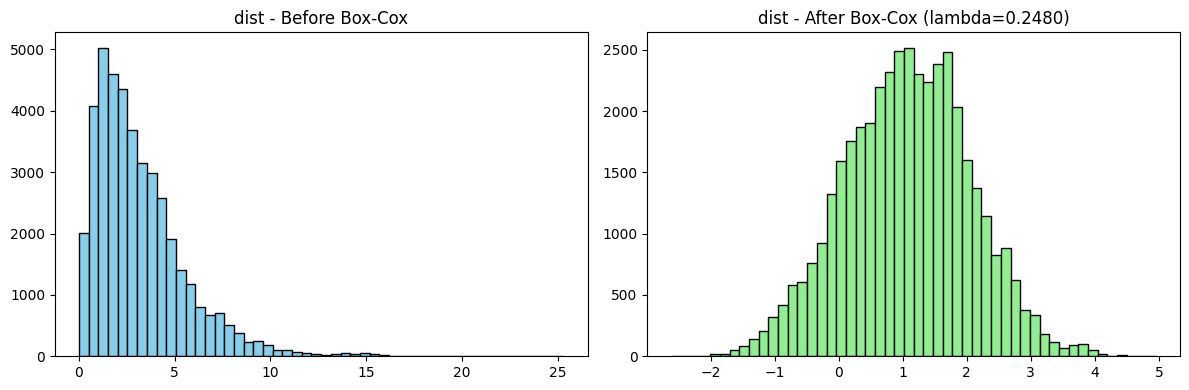

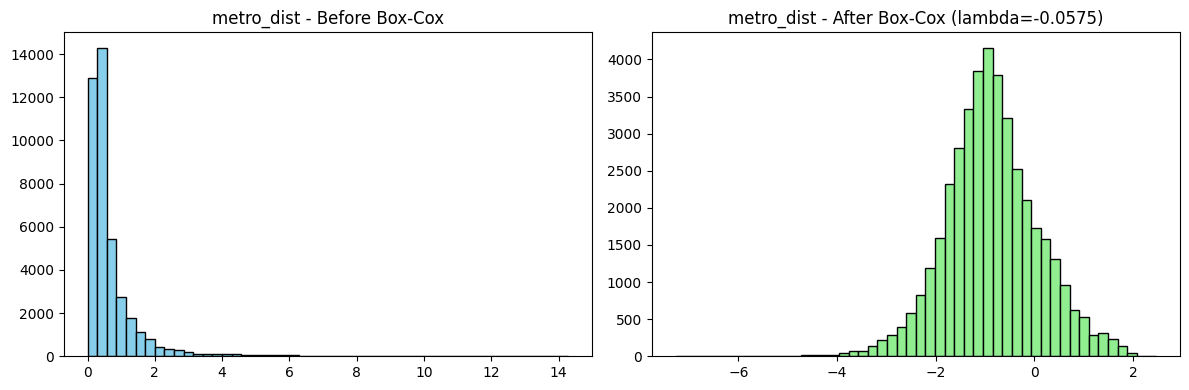


Lambda hasil Box-Cox:
price_night: -0.3459
dist: 0.2480
metro_dist: -0.0575

Descriptive statistics setelah transformasi:
        price_night          dist    metro_dist
count  41365.000000  41365.000000  41365.000000
mean       2.438305      1.073610     -0.868063
std        0.088510      0.983285      0.943298
min        2.062817     -2.608216     -7.269752
25%        2.378630      0.388759     -1.449479
50%        2.437238      1.083792     -0.906527
75%        2.497891      1.743622     -0.310492
max        2.790157      4.951366      2.465273


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import boxcox


cols_to_transform = ['price_night', 'dist', 'metro_dist']
lambdas = {}

for col in cols_to_transform:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col} - Before Box-Cox')
    df[col], fitted_lambda = boxcox(df[col])
    lambdas[col] = fitted_lambda


    axes[1].hist(df[col], bins=50, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'{col} - After Box-Cox (lambda={fitted_lambda:.4f})')

    plt.tight_layout()
    plt.show()

print("\nLambda hasil Box-Cox:")
for col, lamb in lambdas.items():
    print(f"{col}: {lamb:.4f}")

print("\nDescriptive statistics setelah transformasi:")
print(df[cols_to_transform].describe())


**Insight:**
- The columns price_night, dist, and metro_dist initially had a right-skewed distribution. After applying the Box-Cox transformation (with adjustments to ensure all values are >0), the distributions of these three columns became more symmetric and closer to a normal distribution.

- The lambda values resulting from the transformation are:

    - price_night: -0.3459

    - dist: 0.2480

    - metro_dist: -0.0575

- The descriptive statistics after the transformation show that these three columns now have a more stable range and distribution, making the machine learning model more robust to outliers in the future.

## **4. Defining the Data Object**

#### Objective of the Analysis (Objective Statement)

The objective of this analysis is to predict the price per night (price_night) based on various property characteristics, such as room type, capacity, distance to the city center, and other features. Therefore, we need to identify the factors that influence the price per night for each property listing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   41365 non-null  object 
 3   room_shared                 41365 non-null  bool   
 4   room_private                41365 non-null  bool   
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  bool   
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

### Correcting Data Types
This process aims to change the data types of columns in the dataset that are not correctly assigned. The action to be taken is to convert categorical columns into numeric types.


### Encoding

In [ ]:
print(df['room_type'].unique())
print(df['city'].unique())
print(df['country'].unique())


['Entire home/apt' 'Private room' 'Shared room']
['London' 'Vienna' 'Amsterdam' 'Lisbon' 'Berlin' 'Paris' 'Athens'
 'Budapest' 'Barcelona' 'Rome']
['United Kingdom' 'Austria' 'Netherlands' 'Portugal' 'Germany' 'France'
 'Greece' 'Hungary' 'Spain' 'Italy']


In [ ]:
# Manual encoding
room_type_mapping = {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}
city_mapping = {'London': 1, 'Vienna': 2, 'Amsterdam': 3, 'Lisbon': 4, 'Berlin': 5,
                'Paris': 6, 'Athens': 7, 'Budapest': 8, 'Barcelona': 9, 'Rome': 10}
country_mapping = {'United Kingdom': 1, 'Austria': 2, 'Netherlands': 3, 'Portugal': 4,
                   'Germany': 5, 'France': 6, 'Greece': 7, 'Hungary': 8, 'Spain': 9, 'Italy': 9}

df['room_type'] = df['room_type'].map(room_type_mapping)
df['city'] = df['city'].map(city_mapping)
df['country'] = df['country'].map(country_mapping)

df['room_shared'] = df['room_shared'].astype(int)
df['room_private'] = df['room_private'].astype(int)
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
df['weekends'] = df['weekends'].astype(int)

print("Unique values in 'room_type' after manual encoding:", df['room_type'].unique())
print("Unique values in 'city' after manual encoding:", df['city'].unique())
print("Unique values in 'country' after manual encoding:", df['country'].unique())


Unique values in 'room_type' after manual encoding: [0 1 2]
Unique values in 'city' after manual encoding: [ 1  2  3  4  5  6  7  8  9 10]
Unique values in 'country' after manual encoding: [1 2 3 4 5 6 7 8 9]


**Insight:**
- The columns room_type, city, and country are categorical columns that need to be converted into numeric values to be processed in the machine learning model. Manual encoding was chosen to ensure that the category order remains static and independent of the category appearance order in the dataset.

- Using manual encoding, the categories are mapped as follows:

    - room_type: 'Entire home/apt' = 0, 'Private room' = 1, 'Shared room' = 2

    - city: London = 1, Vienna = 2, Amsterdam = 3, Lisbon = 4, etc.

    - country: United Kingdom = 1, Austria = 2, Netherlands = 3, Portugal = 4, etc.

- One-Hot Encoding was not used because it would result in many new columns, which could increase the dataset's dimensionality and model complexity, potentially affecting performance on large datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 41365 non-null  int64  
 1   price_night                 41365 non-null  float64
 2   room_type                   41365 non-null  int64  
 3   room_shared                 41365 non-null  int64  
 4   room_private                41365 non-null  int64  
 5   person_capacity             41365 non-null  int64  
 6   host_is_superhost           41365 non-null  int64  
 7   multi                       41365 non-null  int64  
 8   biz                         41365 non-null  int64  
 9   cleanliness_rating          41365 non-null  int64  
 10  guest_satisfaction_overall  41365 non-null  int64  
 11  bedrooms                    41365 non-null  int64  
 12  dist                        41365 non-null  float64
 13  metro_dist                  413

In [ ]:
X = df.drop(columns=['price_night', 'property_id', 'last_update'])  # drop kolom target dan identifier
y = df['price_night']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Show feature importance
importances = rf.feature_importances_
feature_names = X.columns

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

for feature, importance in zip(sorted_features, sorted_importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: room_type, Importance: 0.18929733147857974
Feature: city, Importance: 0.18035041735565285
Feature: dist, Importance: 0.16062158865013945
Feature: country, Importance: 0.15962415217786763
Feature: metro_dist, Importance: 0.09937106312940515
Feature: guest_satisfaction_overall, Importance: 0.05254126118583833
Feature: bedrooms, Importance: 0.0495117638180803
Feature: person_capacity, Importance: 0.04808301723659258
Feature: cleanliness_rating, Importance: 0.019184857815101753
Feature: biz, Importance: 0.013538730490860774
Feature: multi, Importance: 0.00910489644294443
Feature: host_is_superhost, Importance: 0.007486785381318612
Feature: weekends, Importance: 0.005394116233436565
Feature: room_private, Importance: 0.004492763914863485
Feature: room_shared, Importance: 0.0013972546893183757


**Insight:**
- The Random Forest model indicates that some features have a larger contribution to predicting the price per night (price_night). The most important feature is room_type (importance: 0.189), followed by city (0.183), and dist (0.160). This suggests that location (city) and room type are key factors influencing the price per night.

- Features such as room_shared, room_private, and weekends have very low importance (close to 0), meaning they have little influence on the price per night and may not be very relevant for the price prediction model.

- Identifier columns such as property_id and last_update were not used in the model because they do not provide relevant information for predicting the price. property_id functions solely as a unique identifier and has no relationship with price, while last_update serves more as data update information and does not directly impact the price per night.

- Based on the feature importance obtained, more significant features like city, room_type, and dist should be the main focus for future models predicting price per night.

In [ ]:
df.head(10)

,property_id,price_night,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,country,weekends,last_update
0,556793856,2.554565,0,0,0,4,0,0,1,9,87,2,1.544340,-0.227570,1,1,0,2022-04-09
1,371851269,2.477612,0,0,0,4,0,1,0,9,90,1,1.115108,-1.211096,2,2,0,2024-06-29
2,337379333,2.610939,0,0,0,4,0,0,0,10,98,3,1.424119,-0.152422,3,3,0,2021-05-10
3,423755786,2.452524,0,0,0,4,1,0,0,10,99,1,0.229749,-0.342238,4,4,1,2023-01-29
4,877789195,2.487724,0,0,0,2,0,0,1,10,100,1,1.816086,0.397199,2,2,0,2024-03-26
5,616562711,2.366710,1,0,1,2,0,0,0,10,96,1,1.837313,-1.253690,5,5,0,2023-02-03
6,477495323,2.427919,0,0,0,2,1,0,0,10,96,0,1.503503,-1.466308,6,6,1,2020-12-30
7,512491549,2.258212,0,0,0,4,0,1,0,9,87,2,1.126026,-0.623893,7,7,0,2022-10-21
8,295305248,2.328005,1,0,1,2,0,0,1,8,85,1,1.749560,-0.662083,1,1,1,2020-12-27
9,486670369,2.445461,0,0,0,2,0,0,1,9,89,1,-0.184060,-0.489779,4,4,0,2022-06-13


## **5. Data Cleaning**

#### Handling Missing Data

The missing data, specifically in the country and room_type columns, were addressed earlier in point 3, under the validation section for checking missing values. Therefore, in this section, the focus will be on changing the data type of the last_update column from object to time to assess any potential missing data.

In [ ]:
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   property_id                 41365 non-null  int64         
 1   price_night                 41365 non-null  float64       
 2   room_type                   41365 non-null  int64         
 3   room_shared                 41365 non-null  int64         
 4   room_private                41365 non-null  int64         
 5   person_capacity             41365 non-null  int64         
 6   host_is_superhost           41365 non-null  int64         
 7   multi                       41365 non-null  int64         
 8   biz                         41365 non-null  int64         
 9   cleanliness_rating          41365 non-null  int64         
 10  guest_satisfaction_overall  41365 non-null  int64         
 11  bedrooms                    41365 non-null  int64     

In [ ]:
missing_percentage = df['last_update'].isnull().mean() * 100
print(f"Persentase data yang hilang di kolom 'last_update': {missing_percentage}%")


Persentase data yang hilang di kolom 'last_update': 1.7067569201015351%


In [ ]:
# df = df.dropna(subset=['last_update'])
# df.info()

**Insight:**
- The percentage of missing data in the last_update column is around 1.71%, which is relatively small. Therefore, it was decided not to take any action on these missing values, as in the next steps, the last_update column will be removed because it is considered irrelevant to the target variable.

#### Check Duplicated Data

In [ ]:
df.duplicated().sum()

np.int64(0)

**Insight :**
- there is no duplicated data


#### Removing Outliers

- Outliers were checked during point 2, the Exploring Data stage. The columns price_night, dist, and metro_dist had many outliers due to their right-skewed distributions. These were addressed using the Box-Cox transformation in point 3, during the Data Validation stage.

- person_capacity: There were 73 instances of a value of 0 in this column, which is clearly unrealistic since capacity cannot be 0. These values were replaced with 1, as the value 0 was considered an input error. A value of 1 was chosen because private rooms exist, and this would be the minimum capacity.

- cleanliness_rating: No significant outliers were found in this column after checking. Although there are cleanliness ratings below 8, these are still considered reasonable and were retained without removal.

- guest_satisfaction_overall: Initially, values below 80 were considered outliers. However, since many valid data points exist within this range, these values were imputed using the Winsorization technique, which preserves the data distribution without removing any data.

- bedrooms: Values of 0 and more than 7 bedrooms were found, which were considered input errors. These values were handled using Winsorization, which replaces the extreme values to ensure a more realistic distribution.



In [ ]:
# Winsorization for guest_satisfaction_overall
df['guest_satisfaction_overall'] = df['guest_satisfaction_overall'].apply(lambda x: max(x, 80))
print("Distribusi guest_satisfaction_overall setelah Winsorization:", df['guest_satisfaction_overall'].describe())

Distribusi guest_satisfaction_overall setelah Winsorization: count    41365.000000
mean        93.348410
std          6.225578
min         80.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64


In [ ]:
df['bedrooms'] = df['bedrooms'].replace(0, 1)
df['bedrooms'] = df['bedrooms'].apply(lambda x: min(max(x, 1), 7))

In [ ]:
df['bedrooms']. unique()


array([2, 1, 3, 4, 7, 5, 6])

**Insight:**
- In the guest_satisfaction_overall column, Winsorization was applied by increasing all values below 80 to 80. This was done to reduce the influence of lower outliers that could cause the model to be biased toward properties with very low guest satisfaction ratings, thereby stabilizing the data distribution.

- For the bedrooms column, values of 0 were considered invalid and were replaced with 1, aligning with the data distribution where most properties have 1 bedroom. Additionally, very large values (greater than 7) in the bedrooms column were categorized as outliers based on the boxplot results. As a result, Winsorization was applied, limiting the number of bedrooms to between 1 and 7 to ensure the dataset remains representative and is not influenced by extreme values.

#### Handling Data Inconsistencies:

Inconsistent data was found in the city column, specifically in the spelling of city names. This inconsistency was addressed during the data validation stage (point 3) by standardizing the spelling as follows:

    "Amster dam" and "Amterdam" were changed to "Amsterdam"

    "Roma" was changed to "Rome"

Additionally, the country column has been validated and ensured to be consistent, with no further changes required.

#### Data Transformation

The columns price_night, dist, and metro_dist had many outliers due to a right-skewed distribution. These outliers were addressed using the Box-Cox transformation in point 3, during the Data Validation stage.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   property_id                 41365 non-null  int64         
 1   price_night                 41365 non-null  float64       
 2   room_type                   41365 non-null  int64         
 3   room_shared                 41365 non-null  int64         
 4   room_private                41365 non-null  int64         
 5   person_capacity             41365 non-null  int64         
 6   host_is_superhost           41365 non-null  int64         
 7   multi                       41365 non-null  int64         
 8   biz                         41365 non-null  int64         
 9   cleanliness_rating          41365 non-null  int64         
 10  guest_satisfaction_overall  41365 non-null  int64         
 11  bedrooms                    41365 non-null  int64     

#### Dropping Irrelevant Columns
This process aims to remove columns that are irrelevant or less useful for the analysis to be conducted. In this project, the columns that will be dropped are:

    property_id: The unique ID for each property, which does not provide any information related to the price.

    last_update: The date the data was last updated, which is less relevant for predicting the price.

These columns will be removed to simplify the dataset and focus on the more meaningful features for price prediction.

In [ ]:
df['room_type'].unique()

array([0, 1, 2])

In [ ]:
df.drop(columns=['property_id', 'last_update'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_night                 41365 non-null  float64
 1   room_type                   41365 non-null  int64  
 2   room_shared                 41365 non-null  int64  
 3   room_private                41365 non-null  int64  
 4   person_capacity             41365 non-null  int64  
 5   host_is_superhost           41365 non-null  int64  
 6   multi                       41365 non-null  int64  
 7   biz                         41365 non-null  int64  
 8   cleanliness_rating          41365 non-null  int64  
 9   guest_satisfaction_overall  41365 non-null  int64  
 10  bedrooms                    41365 non-null  int64  
 11  dist                        41365 non-null  float64
 12  metro_dist                  41365 non-null  float64
 13  city                        413

The room_shared and room_private columns can also be removed, as they are essentially derived from the room_type column. Since room_type already provides the necessary information about the room type (e.g., 'Entire home/apt', 'Private room', 'Shared room'), these two columns are redundant and do not add additional value to the analysis. Removing them will help simplify the dataset further.

In [ ]:
df = df.drop(columns=['room_shared', 'room_private'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_night                 41365 non-null  float64
 1   room_type                   41365 non-null  int64  
 2   person_capacity             41365 non-null  int64  
 3   host_is_superhost           41365 non-null  int64  
 4   multi                       41365 non-null  int64  
 5   biz                         41365 non-null  int64  
 6   cleanliness_rating          41365 non-null  int64  
 7   guest_satisfaction_overall  41365 non-null  int64  
 8   bedrooms                    41365 non-null  int64  
 9   dist                        41365 non-null  float64
 10  metro_dist                  41365 non-null  float64
 11  city                        41365 non-null  int64  
 12  country                     41365 non-null  int64  
 13  weekends                    413

## **6. Data Construction**

#### Feature Engineering

This process aims to create new features based on the existing features to be used in the analysis.

In [ ]:
df['price_per_person'] = df['price_night'] / df['person_capacity']
df['price_per_bedroom'] = df['price_night'] / df['bedrooms']

In [ ]:
df.describe()

,price_night,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,country,weekends,price_per_person,price_per_bedroom
count,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000,41365.000000
mean,2.438305,0.376139,3.156509,0.256690,0.291261,0.351505,9.388517,93.348410,1.247286,1.073610,-0.868063,5.488867,5.314275,0.507192,0.896381,2.162624
std,0.088510,0.499217,1.298135,0.436812,0.454349,0.477446,0.959069,6.225578,0.531648,0.983285,0.943298,3.196980,2.964715,0.499954,0.318048,0.518585
min,2.062817,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,-2.608216,-7.269752,1.000000,1.000000,0.000000,0.359873,0.321416
25%,2.378630,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.000000,0.388759,-1.449479,2.000000,2.000000,0.000000,0.610246,2.287668
50%,2.437238,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.000000,1.083792,-0.906527,6.000000,6.000000,1.000000,0.827524,2.397556
75%,2.497891,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.000000,1.743622,-0.310492,8.000000,8.000000,1.000000,1.204997,2.464494
max,2.790157,2.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,7.000000,4.951366,2.465273,10.000000,9.000000,1.000000,2.755193,2.790157


**Insight:**
- The "price_per_person" column is generated to illustrate the cost that each individual must spend during their stay, helping to assess whether the property is more suitable for individuals or large groups.

   - Properties with a lower price_per_person tend to be more suitable for large groups or families looking to reduce the cost per person.

   - Properties with a higher price_per_person are more likely to appeal to individuals seeking more luxurious and exclusive accommodations.

- The "price_per_bedroom" column is generated to provide an overview of the cost per bedroom, indicating whether the price is more influenced by the number of rooms or the quality of the facilities offered.

   - Properties with a lower price_per_bedroom may be more focused on a larger number of bedrooms (such as large houses or apartments), while properties with a higher price_per_bedroom are likely more focused on the quality or amenities per bedroom, such as luxurious bedrooms or more exclusive accommodations.

   - Properties targeting large families or groups tend to have a lower price per bedroom, while properties targeting more exclusive or luxurious stays will generally have a higher price per bedroom.

## **Download Preprocessed Data**

In [ ]:
def preprocess_training(training_df):

    return training_df

df = preprocess_training(df)

# Simpan data yang sudah diproses ke file CSV
df.to_csv('dataset_properti_utama_preprocessed.csv', index=False)

from google.colab import files
files.download('dataset_properti_utama_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **7. Determining Data Labels**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_night                 41365 non-null  float64
 1   room_type                   41365 non-null  int64  
 2   person_capacity             41365 non-null  int64  
 3   host_is_superhost           41365 non-null  int64  
 4   multi                       41365 non-null  int64  
 5   biz                         41365 non-null  int64  
 6   cleanliness_rating          41365 non-null  int64  
 7   guest_satisfaction_overall  41365 non-null  int64  
 8   bedrooms                    41365 non-null  int64  
 9   dist                        41365 non-null  float64
 10  metro_dist                  41365 non-null  float64
 11  city                        41365 non-null  int64  
 12  country                     41365 non-null  int64  
 13  weekends                    413

In [ ]:
# X dan y
X = df.drop(columns=[ 'price_per_person', 'price_per_bedroom', 'price_night'])
y = df['price_night']

y is the target column, which is price_night, while x represents the predictors. All columns are used because they will be applied to the Random Forest Regressor algorithm and also the Neural Network (NN), which will adapt to all of its features.

## **8. Modeling dan 9. Evaluation**

### Random Forest Regressor

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)

# Grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# GridSearchCV for search best param
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")


Root Mean Squared Error (RMSE) on Test Data: 0.03931534650055456


In [ ]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print(comparison_df.head())


       Actual Price  Predicted Price
17822      2.465613         2.460752
34713      2.443278         2.416477
30175      2.404339         2.390740
37222      2.439581         2.452270
27635      2.360341         2.362711


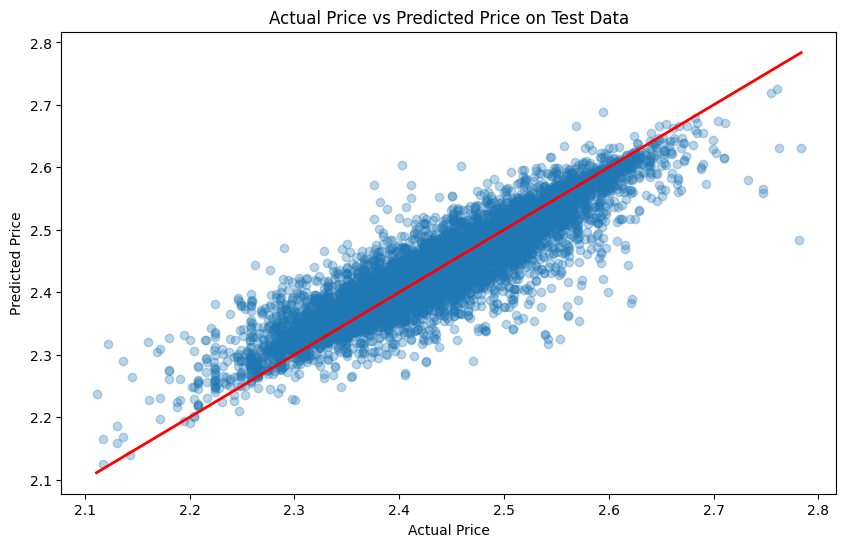

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Garis referensi
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price on Test Data")
plt.show()


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.028208570688784934
R-squared (R²): 0.7998533160925794


In [ ]:
joblib.dump(best_rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
import os

# Check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# List files in the current directory to check if the models are there
files_in_directory = os.listdir(current_directory)
print("Files in current directory:", files_in_directory)


Current working directory: /content
Files in current directory: ['.config', 'best_nn_model.h5', 'dataset_properti_utama.csv', 'random_forest_model.pkl', 'sample_data']


### Neural Network

In [ ]:
# Spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install scikeras

In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras


In [ ]:
!pip install scikeras
!pip install scikeras --upgrade
!pip install scikit-learn --upgrade


Training with batch_size=16, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.06047439368325372, MAE: 0.047004927196730814, R²: 0.5264484860715524
Training with batch_size=16, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.057476709622323, MAE: 0.04414822408629486, R²: 0.5722323086648267
Training with batch_size=32, epochs=10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 0.06169100494512099, MAE: 0.04819827082565453, R²: 0.5072032061402647
Training with batch_size=32, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 0.05369818779934442, MAE: 0.040768353698940794, R²: 0.6266265415073314
Best parameters found:  {'batch_size': 32, 'epochs': 20}
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Model RMSE: 0.05369818779934442
Best Model MAE: 0.040768353698940794
Best Model R-squared (R²): 0.6266265415073314
       Actual Price  Predicted Price
17822      2.465613         2.487026
34713      2.443278         2.449396
30175      2.404339         2.376479
37222      2.439581         2.434464
27635      2.360341         2.328693


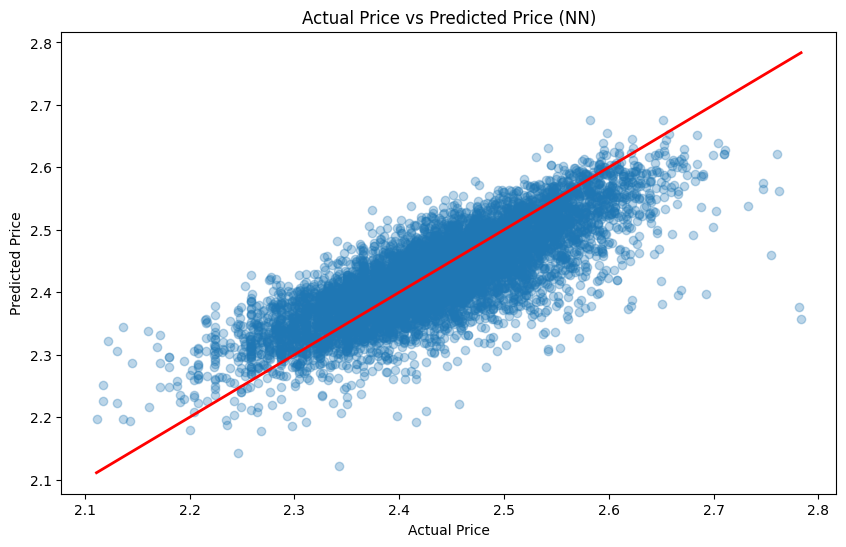

In [ ]:
# Define Neural Network Model function
def build_nn_model(input_dim, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=input_dim))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))  # Output layer for regression

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Load  dataset (replace this with your actual dataset)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter grid for tuning
param_grid = {
    'batch_size': [16, 32],  # Batch size options
    'epochs': [10, 20]       # Epochs options
}

# Manually perform hyperparameter tuning
best_rmse = float('inf')
best_params = {}

for batch_size in param_grid['batch_size']:
    for epochs in param_grid['epochs']:
        print(f"Training with batch_size={batch_size}, epochs={epochs}")

        # Create and train the model
        model_nn = build_nn_model(input_dim=X_train_scaled.shape[1])
        model_nn.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict on the test set
        y_test_pred_nn = model_nn.predict(X_test_scaled)

        # Evaluate the model
        rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
        mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
        r2_nn = r2_score(y_test, y_test_pred_nn)

        print(f"RMSE: {rmse_nn}, MAE: {mae_nn}, R²: {r2_nn}")

        # Check if this is the best model so far
        if rmse_nn < best_rmse:
            best_rmse = rmse_nn
            best_params = {'batch_size': batch_size, 'epochs': epochs}
            best_model = model_nn

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate the best model on the test set
y_test_pred_best_nn = best_model.predict(X_test_scaled)

# Compute performance metrics for the best model
rmse_best_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_best_nn))
mae_best_nn = mean_absolute_error(y_test, y_test_pred_best_nn)
r2_best_nn = r2_score(y_test, y_test_pred_best_nn)

# Print evaluation metrics for the best model
print(f"Best Model RMSE: {rmse_best_nn}")
print(f"Best Model MAE: {mae_best_nn}")
print(f"Best Model R-squared (R²): {r2_best_nn}")

# Create a comparison dataframe for actual vs predicted prices
comparison_best_nn_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_test_pred_best_nn.flatten()
})

# Print the first few rows of the comparison dataframe
print(comparison_best_nn_df.head())

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_best_nn, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (NN)")
plt.show()


In [ ]:
best_model.save('best_nn_model.h5')
print("Model saved as 'best_nn_model.h5'")

Model saved as 'best_nn_model.h5'


In [ ]:
import os

# Check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")


Current working directory: /content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Save Keras model to Google Drive
best_model.save('/content/drive/My Drive/best_nn_model.h5')

# Save Random Forest model to Google Drive
joblib.dump(best_rf_model, '/content/drive/My Drive/random_forest_model.pkl')


['/content/drive/My Drive/random_forest_model.pkl']

**Insight:**
- Two models were built to predict price_night, namely Random Forest Regressor (RF) and Neural Network (NN):

   - Random Forest Regressor (RF): An ensemble model based on decision trees that combines predictions from multiple trees to provide more stable and accurate results.

   - Neural Network (NN): A deep learning model that attempts to capture complex relationships in data using layers of networks.

- The Random Forest Regressor (RF) model showed better performance in predicting price_night:

   - RMSE: 0.0393, which is lower, indicating smaller prediction errors.

   - MAE: 0.0282, indicating the average difference between predictions and actual prices is relatively small.

   - R-squared (R²): 0.7999, meaning the RF model can explain around 80% of the variation in nightly price, showing excellent predictive ability.

- The Neural Network (NN) model, although capable of learning more complex patterns, showed lower performance compared to RF:

   - RMSE: 0.0537, which is higher than the RF model, indicating larger prediction errors.

   - MAE: 0.0408, showing that the predictions of the NN model have a larger average error.

   - R-squared (R²): 0.6266, meaning it can only explain about 63% of the variation in nightly price, indicating that the NN model is less accurate in capturing the relationship between features and target.

- The Random Forest Regressor (RF) model is more suitable as it has smaller prediction errors and can explain most of the variation in price_night, making it more reliable for price prediction applications. While the NN model, although more complex, does not provide significant accuracy improvements over RF.

## **TESTING DATA**

In [ ]:
testing = pd.read_csv('/content/dataset_properti_uji.csv')
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 10342 non-null  int64  
 1   room_type                   10342 non-null  object 
 2   room_shared                 10342 non-null  bool   
 3   room_private                10342 non-null  bool   
 4   person_capacity             10342 non-null  int64  
 5   host_is_superhost           10342 non-null  bool   
 6   multi                       10342 non-null  int64  
 7   biz                         10342 non-null  int64  
 8   cleanliness_rating          10342 non-null  int64  
 9   guest_satisfaction_overall  10342 non-null  int64  
 10  bedrooms                    10342 non-null  int64  
 11  dist                        10342 non-null  float64
 12  metro_dist                  10342 non-null  float64
 13  city                        103

In [ ]:
num_col = [
    'property_id','person_capacity', 'multi', 'biz',
    'cleanliness_rating', 'guest_satisfaction_overall',
    'bedrooms', 'dist', 'metro_dist'
]

cat_col = [
    'room_type', 'room_shared', 'room_private',
    'host_is_superhost', 'city', 'country',
    'weekends', 'last_update'
]

for col in num_col:
    print(f"Value counts for {col}:\n{testing[col].value_counts()}\n")


Value counts for property_id:
property_id
301401990    1
730071051    1
776732713    1
145096750    1
292814896    1
            ..
707133566    1
715128935    1
885653593    1
575406163    1
191627332    1
Name: count, Length: 10342, dtype: int64

Value counts for person_capacity:
person_capacity
2    4875
4    2748
3    1236
6     888
5     595
Name: count, dtype: int64

Value counts for multi:
multi
0    7325
1    3017
Name: count, dtype: int64

Value counts for biz:
biz
0    6774
1    3568
Name: count, dtype: int64

Value counts for cleanliness_rating:
cleanliness_rating
10    6034
9     3085
8      885
7      169
6      103
2       27
4       26
5       11
3        2
Name: count, dtype: int64

Value counts for guest_satisfaction_overall:
guest_satisfaction_overall
100    2195
98      771
96      726
97      716
93      661
95      622
90      516
94      510
99      469
92      402
80      401
91      390
88      286
89      265
87      253
85      163
86      153
84      124
83  

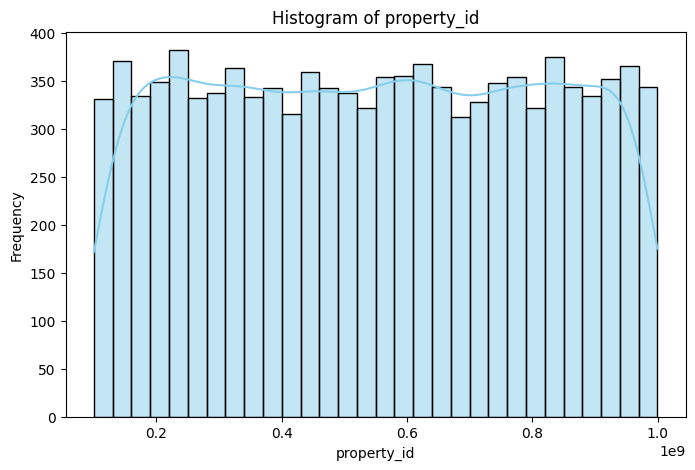

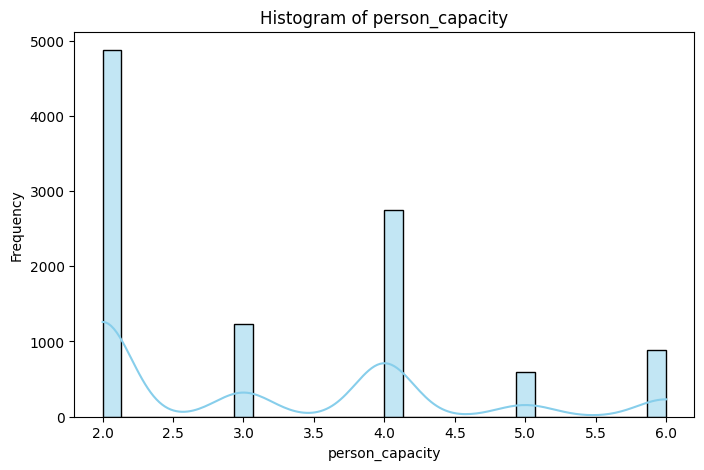

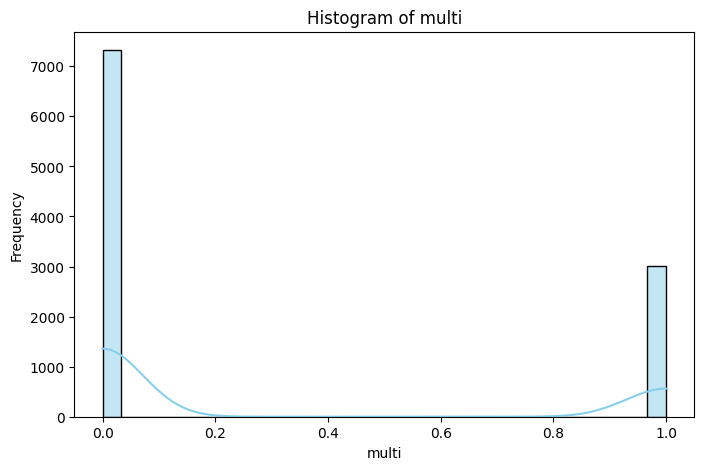

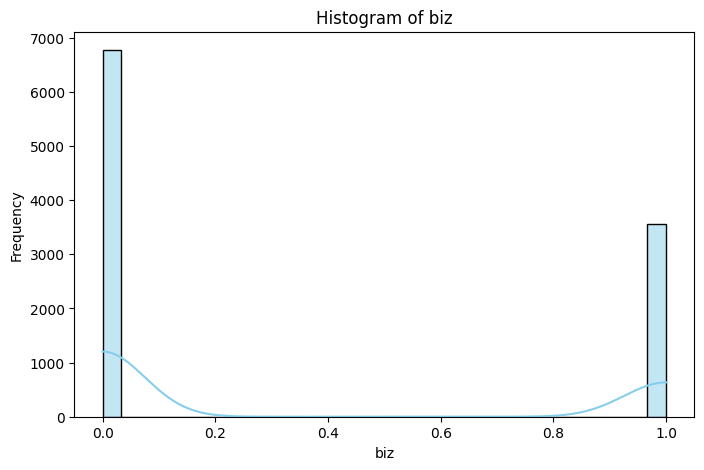

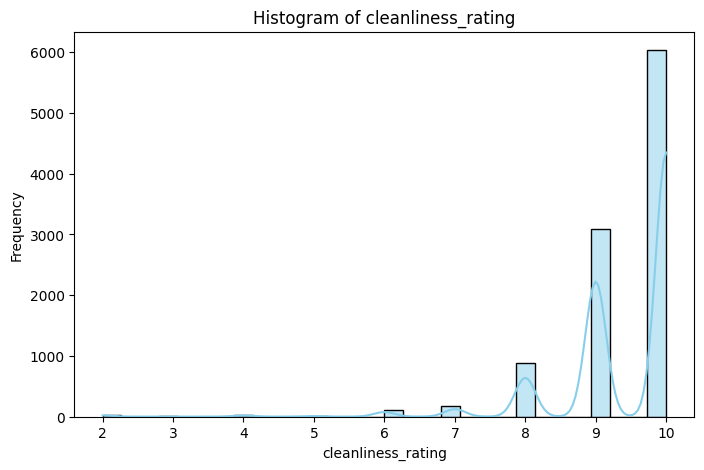

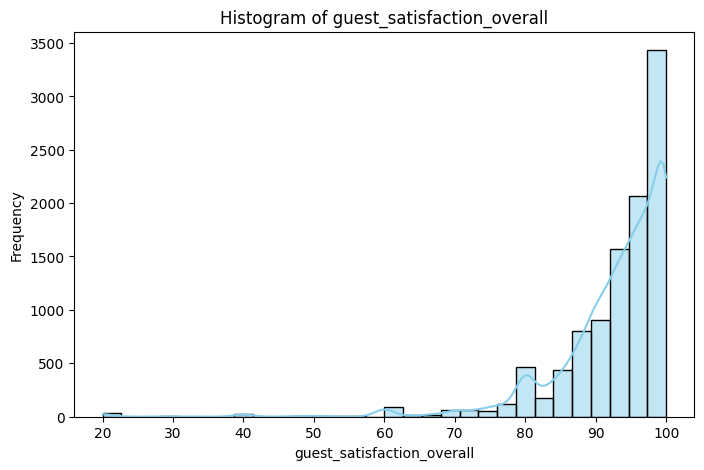

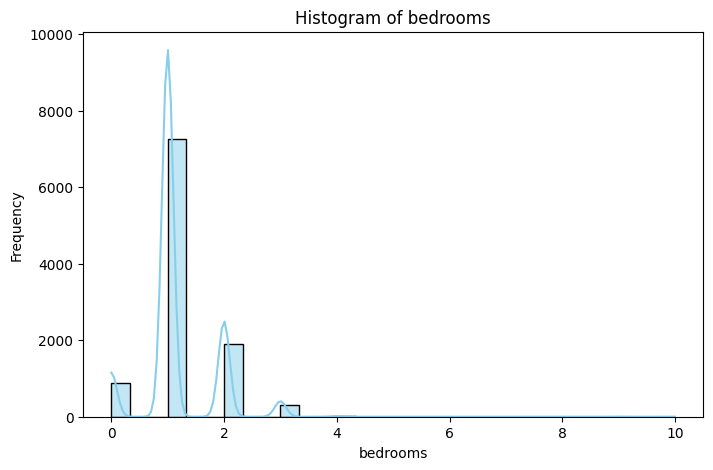

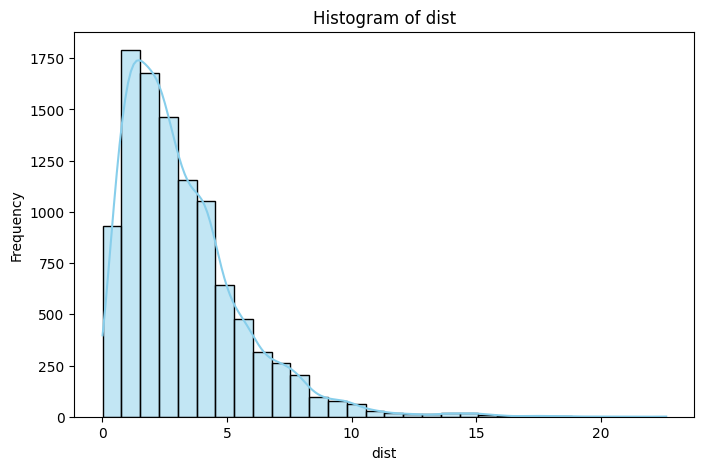

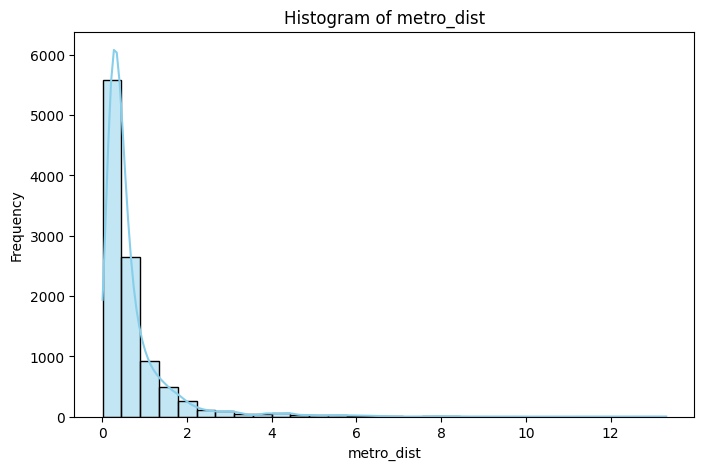

In [ ]:
for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(testing[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


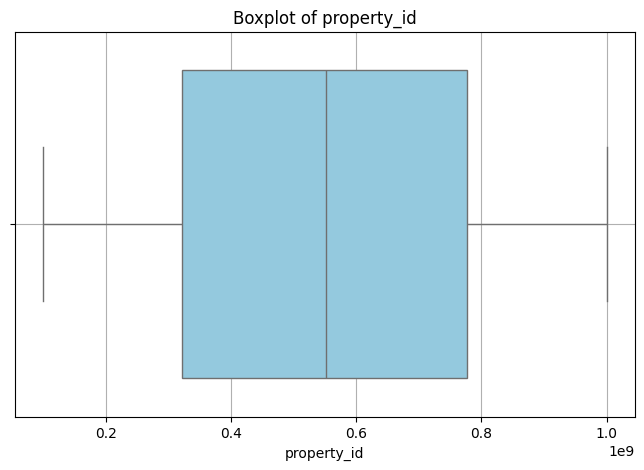

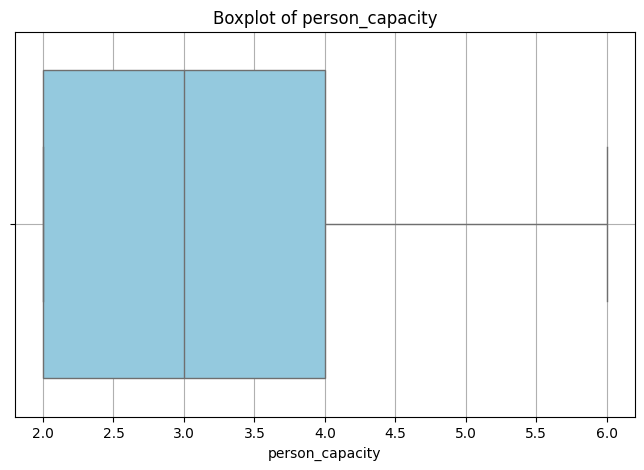

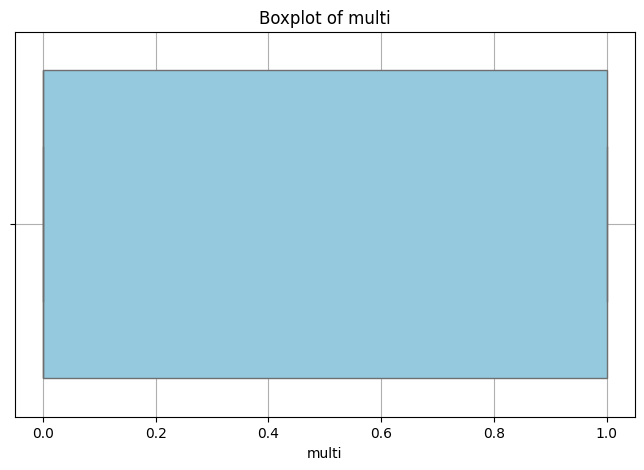

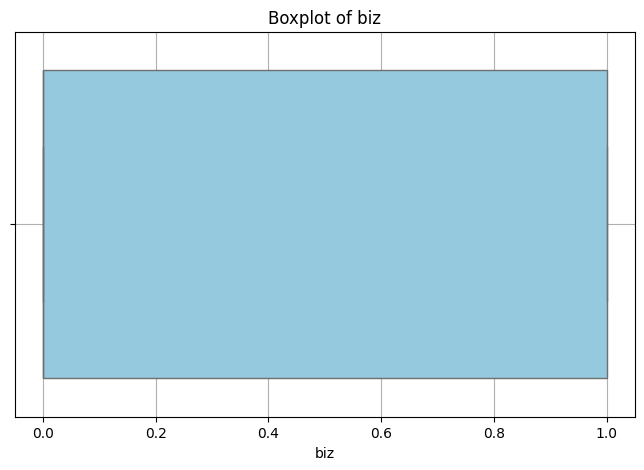

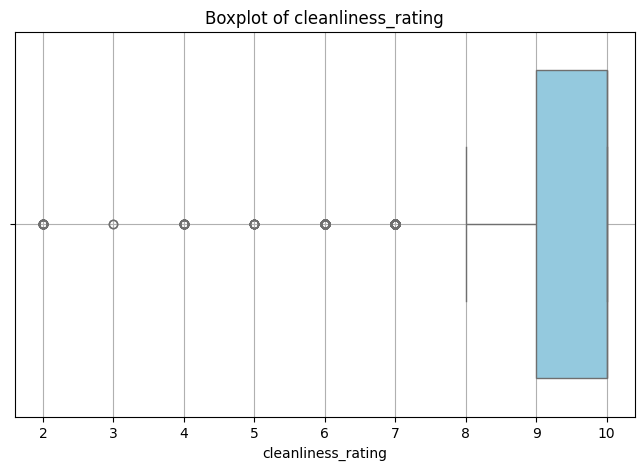

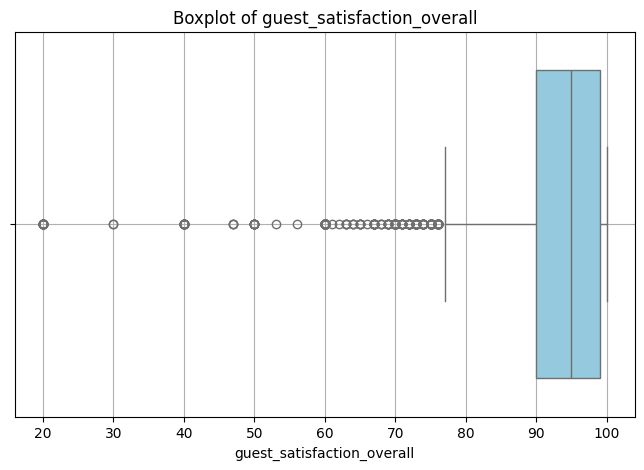

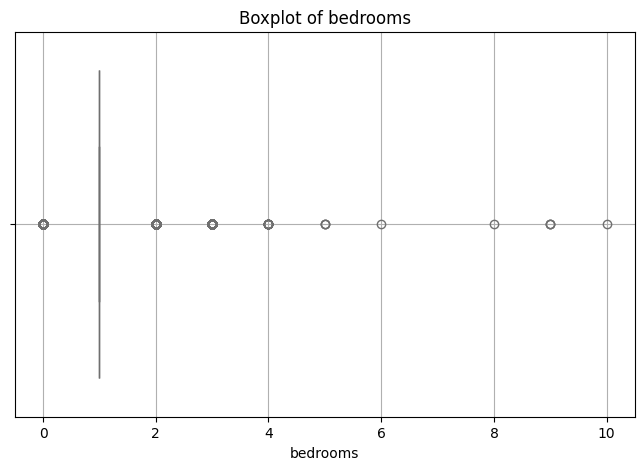

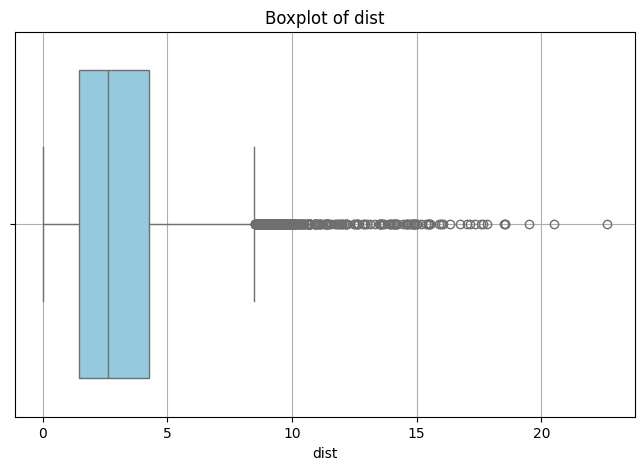

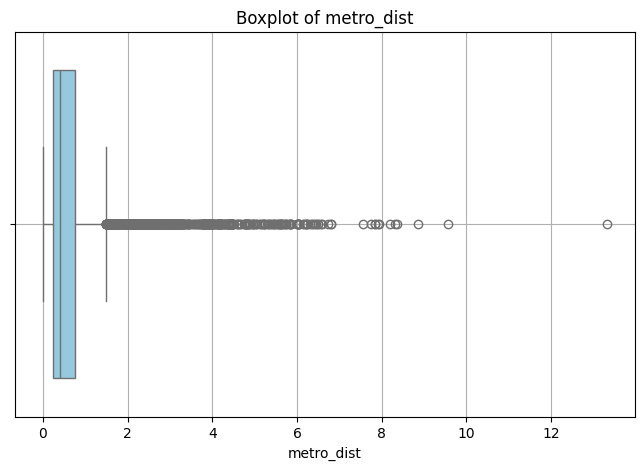

In [ ]:
for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=testing[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()


In [ ]:
lambdas = {
    'dist': 0.2480,
    'metro_dist': -0.0575
}

# Transforming only dist and metro_dist
cols_to_transform = ['dist', 'metro_dist']
for col in cols_to_transform:
    testing[col] = boxcox(testing[col], lmbda=lambdas[col])

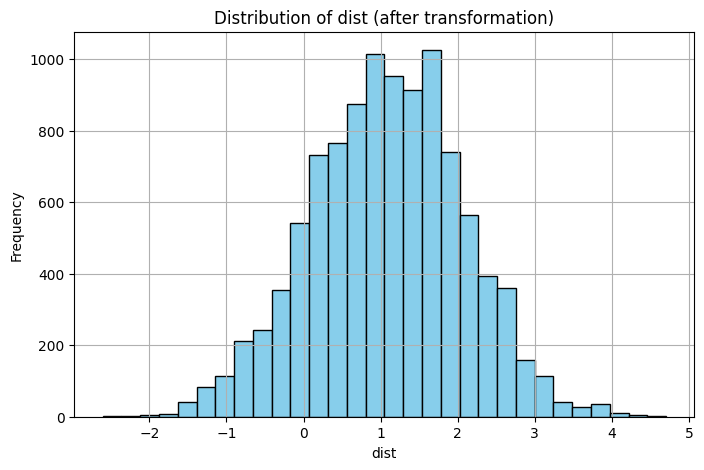

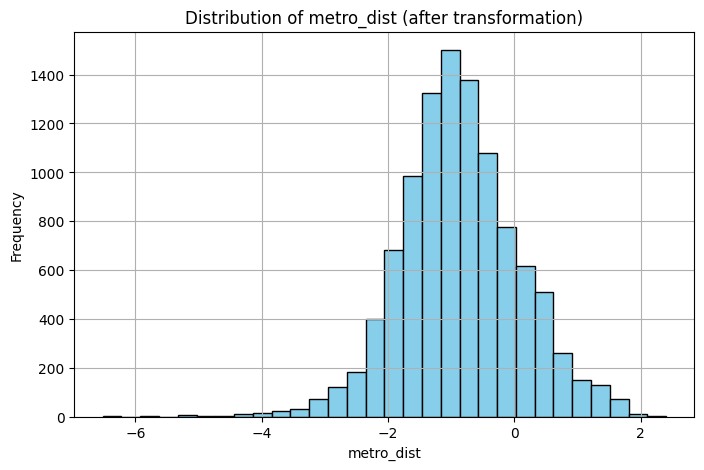

In [ ]:
import matplotlib.pyplot as plt
# Histogram for 'dist' after transformation
plt.figure(figsize=(8, 5))
plt.hist(testing['dist'], bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of dist (after transformation)')
plt.xlabel('dist')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for 'metro_dist' after transformation
plt.figure(figsize=(8, 5))
plt.hist(testing['metro_dist'], bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of metro_dist (after transformation)')
plt.xlabel('metro_dist')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **Winzorization**
features guest_satisfaction_overall and bedroom same as training data

In [ ]:
testing['guest_satisfaction_overall'] = testing['guest_satisfaction_overall'].apply(lambda x: max(x, 80))

testing['bedrooms'] = testing['bedrooms'].replace(0, 1)
testing['bedrooms'] = testing['bedrooms'].apply(lambda x: min(max(x, 1), 7))

In [ ]:
for col in cat_col:
    print(testing[col].value_counts(dropna=False))
    print("-" * 20)

room_type
Entire home/apt    6541
Private room       3736
Shared room          65
Name: count, dtype: int64
--------------------
room_shared
False    10277
True        65
Name: count, dtype: int64
--------------------
room_private
False    6606
True     3736
Name: count, dtype: int64
--------------------
host_is_superhost
False    7728
True     2614
Name: count, dtype: int64
--------------------
city
London       1999
Rome         1805
Paris        1338
Lisbon       1153
Athens       1056
Budapest      804
Vienna        707
Barcelona     567
Berlin        497
Amsterdam     416
Name: count, dtype: int64
--------------------
country
United Kingdom    1999
Italy             1805
France            1338
Portugal          1153
Greece            1056
NaN                804
Austria            707
Spain              567
Germany            497
Netherlands        416
Name: count, dtype: int64
--------------------
weekends
True     5227
False    5115
Name: count, dtype: int64
--------------------


#### **Mapping city to country**

In [ ]:
city_to_country = {
    'London': 'United Kingdom',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Lisbon': 'Portugal',
    'Berlin': 'Germany',
    'Paris': 'France',
    'Athens': 'Greece',
    'Budapest': 'Hungary',
    'Barcelona': 'Spain',
    'Rome': 'Italy'
}
testing.loc[testing['country'].isna(), 'country'] = testing.loc[testing['country'].isna(), 'city'].map(city_to_country)


In [ ]:
testing['country'].unique()

array(['United Kingdom', 'Italy', 'Greece', 'Germany', 'France',
       'Netherlands', 'Hungary', 'Spain', 'Portugal', 'Austria'],
      dtype=object)

In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 10342 non-null  int64  
 1   room_type                   10342 non-null  object 
 2   room_shared                 10342 non-null  bool   
 3   room_private                10342 non-null  bool   
 4   person_capacity             10342 non-null  int64  
 5   host_is_superhost           10342 non-null  bool   
 6   multi                       10342 non-null  int64  
 7   biz                         10342 non-null  int64  
 8   cleanliness_rating          10342 non-null  int64  
 9   guest_satisfaction_overall  10342 non-null  int64  
 10  bedrooms                    10342 non-null  int64  
 11  dist                        10342 non-null  float64
 12  metro_dist                  10342 non-null  float64
 13  city                        103

#### **Drop feature**

In [ ]:
cols_to_drop = ['last_update', 'room_shared', 'room_private']
testing = testing.drop(columns=cols_to_drop)


#### **Manualy Encoding**

In [ ]:
room_type_mapping = {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}
city_mapping = {'London': 1, 'Vienna': 2, 'Amsterdam': 3, 'Lisbon': 4, 'Berlin': 5,
                'Paris': 6, 'Athens': 7, 'Budapest': 8, 'Barcelona': 9, 'Rome': 10}
country_mapping = {'United Kingdom': 1, 'Austria': 2, 'Netherlands': 3, 'Portugal': 4,
                    'Germany': 5, 'France': 6, 'Greece': 7, 'Hungary': 8, 'Spain': 9, 'Italy': 9}

testing['room_type'] = testing['room_type'].map(room_type_mapping)
testing['city'] = testing['city'].map(city_mapping)
testing['country'] = testing['country'].map(country_mapping)

testing['host_is_superhost'] = testing['host_is_superhost'].astype(int)
testing['weekends'] = testing['weekends'].astype(int)

In [ ]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_id                 10342 non-null  int64  
 1   room_type                   10342 non-null  int64  
 2   person_capacity             10342 non-null  int64  
 3   host_is_superhost           10342 non-null  int64  
 4   multi                       10342 non-null  int64  
 5   biz                         10342 non-null  int64  
 6   cleanliness_rating          10342 non-null  int64  
 7   guest_satisfaction_overall  10342 non-null  int64  
 8   bedrooms                    10342 non-null  int64  
 9   dist                        10342 non-null  float64
 10  metro_dist                  10342 non-null  float64
 11  city                        10342 non-null  int64  
 12  country                     10342 non-null  int64  
 13  weekends                    103

#### **Download preprocesing data testing**

In [ ]:
def preprocess_testing(testing_df):

    return testing_df

testing = preprocess_testing(testing)

testing.to_csv('dataset_properti_uji_preprocessed.csv', index=False)

from google.colab import files
files.download('dataset_properti_uji_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
testing = pd.read_csv('/content/dataset_properti_uji_preprocessed.csv')

model = joblib.load('/content/random_forest_model.pkl')  # Load the model using joblib

lambda_price_night = -0.3459

X_test = testing.drop(columns=['property_id'])
y_pred_transformed = model.predict(X_test)

y_pred_original = inv_boxcox(y_pred_transformed, lambda_price_night)

submission = pd.DataFrame({
    'property_id': testing['property_id'],
    'price_night': y_pred_original
})
print(submission.head(10))

   property_id  price_night
0    730071051   152.419368
1    776732713   203.732239
2    145096750    99.033469
3    292814896    97.604049
4    236847155   140.491091
5    123207740   325.928721
6    191627332   426.836654
7    575406163   290.841253
8    885653593   121.000227
9    715128935   128.797076


In [ ]:
submission.to_csv('prediksi_price_night.csv', index=False)

print("Prediksi harga sudah dikembalikan ke harga asli dan disimpan di prediksi_price_night.csv")

files.download('prediksi_price_night.csv')


Prediksi harga sudah dikembalikan ke harga asli dan disimpan di prediksi_price_night.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>